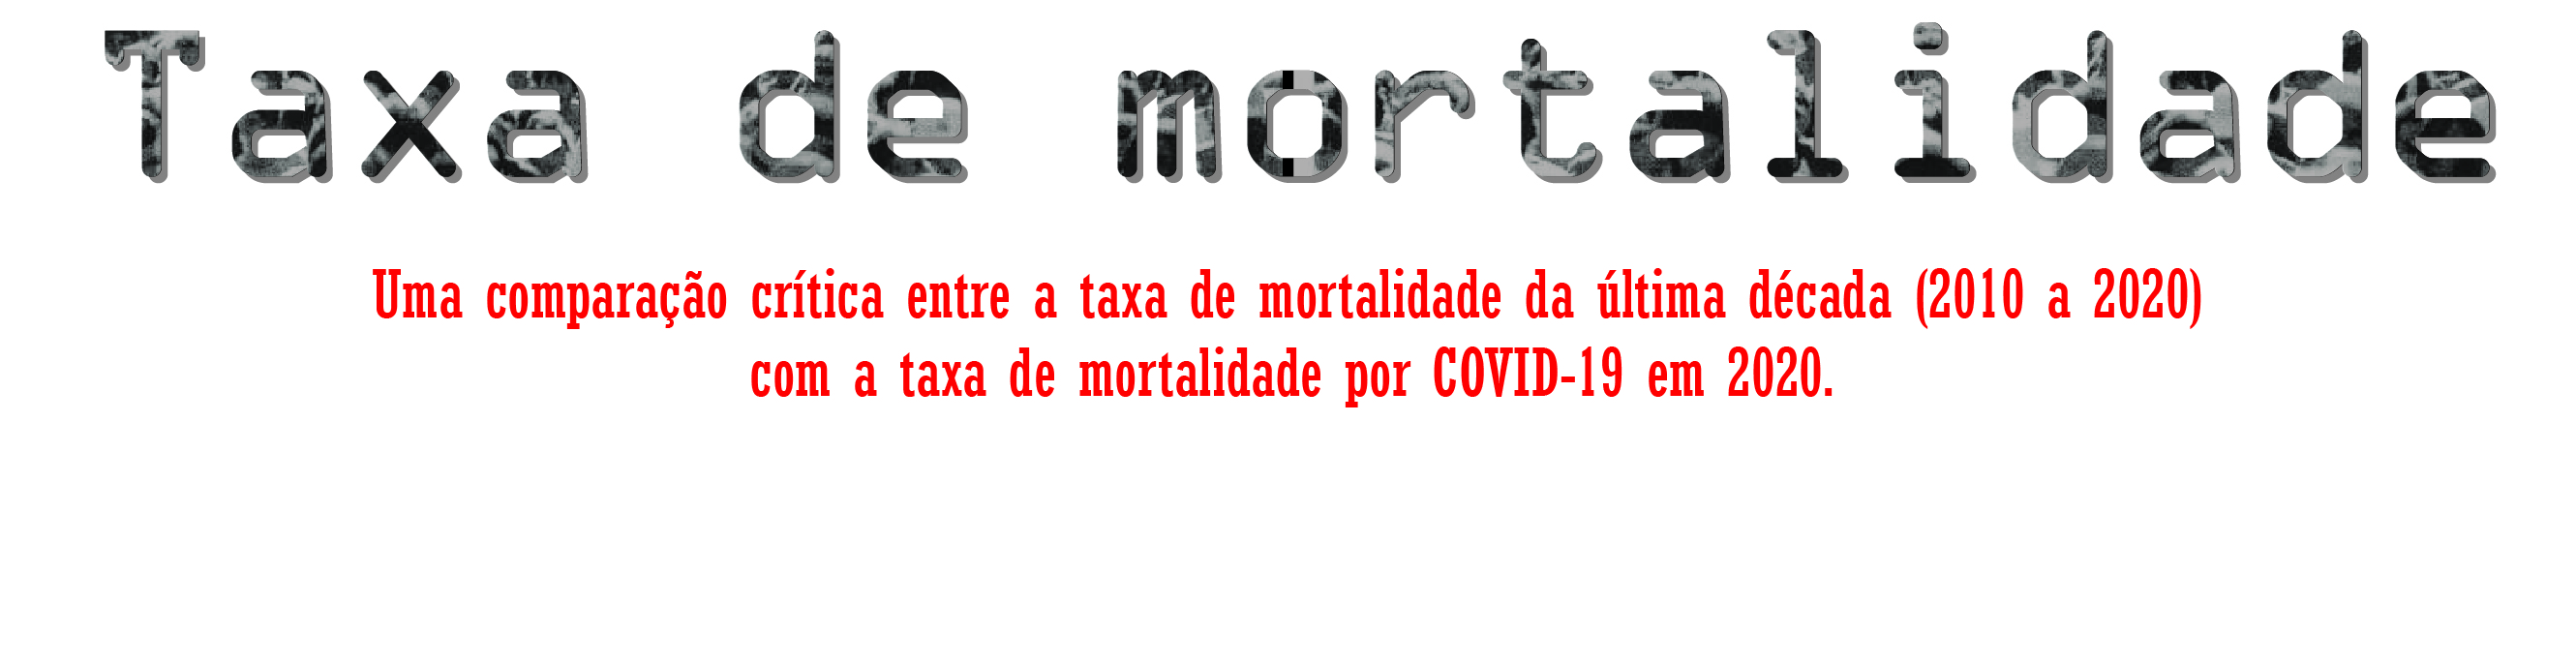

**SARA LUIZA ZACHI ROMEU**

26 de maio de 2021

# **1. Introdução**

No dia 6 de abril de 2021, a Fundação Oswaldo Cruz (Fiocruz) divulgou um boletim afirmando ter aumentado de 3,3% para 4,2%, em março, a taxa de letalidade entre os infectados pela Covid-19 [[1](https://g1.globo.com/bemestar/coronavirus/noticia/2021/04/06/fiocruz-diz-que-taxa-de-letalidade-por-covid-19-no-brasil-aumentou-em-marco-para-42percent.ghtml)]. No Brasil, ao final de maio (2021), foram confirmados 461.931 óbitos acumulados por COVID-19. Além disso, o número de casos acumulados de Coronavírus por semana epidemiológica de notificação continua aumentando [[2](https://covid.saude.gov.br/)]. Deste modo, o presente estudo visa realizar uma comparação crítica entre a taxa de mortalidade da última década (2010 a 2020) com a mesma taxa por COVID-19 em 2020. O estudo será realizado nas 5 Unidades de Federação brasileiras com maior taxa casos de morte na última decada: São Paulo (SP), Rio de Janeiro (RJ), Rio Grande do SUL (RS), Paraná (PA) e Bahia (BA).



# **2. Metodologia**

O referente estudo foi realizado em duas etapas: a primeira onde extraímos os datasets utilizados no estudo da base de dados governamental e a segunda onde tratamos os dados adquiridos para realizar nossos estudos.

## **2.1. Extração de dados e importação dos dataset e bibliotecas**

Os datasets utilizados nesse projeto foram extraídos da seção de Produção Hospitalar e de Projeção da População das Unidades de Federação do DATASUS no Tabnet [[3](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), [4](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?ibge/cnv/projpopuf.def)], e també de obitos_cartorio da base de datasets do COVID-19 no site Brasil.io [[5](https://brasil.io/dataset/covid19/obito_cartorio/)]. O banco de dados foi exportado via .csv para o Google Colaboratory e tratados com a linguagem Python utilizando as bibliotecas pandas, matplotlib, numpy e seaborn.

**2.1.1. Importação de bibliotecas**

Para manipularmos e analizarmos nossos datasets importamos a biblioteca Pandas. Importamos o Numpy também para possibilitar os cálculos em Arrays Multidimensionais e usamos o MatplotLib e Seaborn para visualização de dados do nosso estudo.

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
#setting charts style
sns.color_palette("gist_heat", 5)
sns.set()

#transforming scientific numbers on data sheat into extended numbers
pd.options.display.float_format = "{:.2f}".format

**2.1.2. Aquisição dos datasets e importação para o notebook**

Na aba de produção hospitlar do DATASUS, a opção selecionada para *'Produção Hospitalar (SIH/SUS)'* foi *'Dados Consolidados AIH (RD), por local de internação, a partir de 2008'*, e a *'Abrangência Geográfica'* utilizada foi *'Brasil por Região e Unidade de Federação'*. Na aba seguinte, para baixar o dataset, foram selecionados, respectivamente da esquerda para direita,  *'Unidade de Federação'*, *'Ano/mês processamento'* e *'Óbitos'*. Os mêses escolhidos foram de Jan/2018 a Dez/2020. 

Para extrair o dataset obitos_cartorio do COVID-19, a opção selecionada em todos os filtros foi *'Todos'*. 

A projeção do dataset da população do Brasil por Unidades da Federação para o período 2010-2020 também foi feita através do DATASUS. Desta vez voram selecionados: Unidade de Federação, Ano, População residente e período de 2010 a 2020, respectivamente.

Adquiridos os arquivos CSV do DATASUS e Brasil.io, os mesmos foram importados para um repositório do Github: *'
Projeto_Datasus* [6](https://github.com/SaraZachi/Projeto_Taxa-de-mortalidade/edit/main/README.md). Deste modo, foi possível extrair o endereço do link de cada .csv e importá-los para o notebook da seguinte maneira:

In [3]:
# Importando o dataset da população residente por Unidade de Federação de 2010 a 2020 do DATASUS
link_populacao = 'https://github.com/SaraZachi/Projeto_Taxa-de-mortalidade/blob/main/Datasets%20utilizados/Popula%C3%A7%C3%A3o%20residente%20por%20Ano%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o.csv?raw=true'
df_pop = pd.read_csv(link_populacao, encoding = 'ISO-8859-1',
                          skiprows = 3, skipfooter=12, sep=';')
df_pop.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,11 Rondônia,1663490,1685697,1707272,1728214,1748531,1768204,1787279,1805788,1823741,1841142,1857992
1,12 Acre,734447,748616,762631,776463,790101,803513,816687,829619,842290,854691,866811
2,13 Amazonas,3604165,3672969,3740976,3807921,3873743,3938336,4001667,4063614,4124033,4182899,4240210
3,14 Roraima,460678,469943,479073,488072,496936,505665,514229,522636,530879,538963,546891
4,15 Pará,7638340,7751993,7862333,7969654,8073924,8175113,8272724,8366628,8457229,8544639,8628901


In [4]:
# Importando o dataset do n° de óbitos por fedetação de 2018 a 2020 do DATASUS
link_datasus = 'https://raw.githubusercontent.com/SaraZachi/1_Projeto_BootCamp_Alura_2021/main/Datasets%20utilizados/dataset_obitos_UF_2008a2020.csv?raw=true'
dataset_sus = pd.read_csv(link_datasus, encoding = 'ISO-8859-1',
                          skiprows = 3, skipfooter=12, sep=';')
dataset_sus.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
0,11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,...,266,262,235,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,35731
1,12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,-,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,...,148,153,106,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,18079
2,13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,...,470,408,403,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,60221
3,14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,...,93,83,87,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,11667
4,15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,...,986,940,859,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,135921


In [5]:
# Importando o dataset do n° de óbitos por fedetação devido ao COVID em 2020
link_covid = 'https://github.com/SaraZachi/1_Projeto_BootCamp_Alura_2021/blob/main/Datasets%20utilizados/obito_cartorio.csv?raw=true'
dataset_covid = pd.read_csv(link_covid, encoding = 'ISO-8859-1', sep=',')
dataset_covid.head()

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
0,2020-01-01,AC,1,1,0,2,4,3,1,0,0,1,1,8,2,2,0,10,14,nan,2.00,4.00,3.00,1.00,nan,nan,1.00,1.00,8.00,2.00,2.00,nan,10,14
1,2020-01-02,AC,1,1,0,2,10,3,2,0,0,1,1,14,4,4,0,17,24,nan,nan,6.00,nan,1.00,nan,nan,nan,nan,6.00,2.00,2.00,nan,7,10
2,2020-01-03,AC,1,1,0,2,16,3,4,0,0,1,1,22,7,6,0,25,37,nan,nan,6.00,nan,2.00,nan,nan,nan,nan,8.00,3.00,2.00,nan,8,13
3,2020-01-04,AC,1,1,0,2,18,6,5,0,0,1,2,26,7,7,0,31,43,nan,nan,2.00,3.00,1.00,nan,nan,nan,1.00,4.00,nan,1.00,nan,6,6
4,2020-01-05,AC,1,2,0,2,24,7,5,0,0,1,3,30,11,7,0,38,52,nan,nan,6.00,1.00,nan,nan,nan,nan,1.00,4.00,4.00,nan,nan,7,9


## **2.2. Organizando os datasets**

**2.2.1. Organizando o dataset de óbitos da última década**

In [6]:
# cópia dos dados originais para garantir que eles não sejam sobrescritos
datasus_clean = dataset_sus.copy()

# removendo os números dos nomes das unidades da federação
datasus_clean['Unidade da Federação'] = datasus_clean['Unidade da Federação'].str[3:]

datasus_clean.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
0,Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,...,266,262,235,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,35731
1,Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,-,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,...,148,153,106,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,18079
2,Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,...,470,408,403,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,60221
3,Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,...,93,83,87,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,11667
4,Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,...,986,940,859,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,135921


In [7]:
# Transformando'Unidade da Federação' no index do dataset
datasus_clean = datasus_clean.set_index('Unidade da Federação')
datasus_clean.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,194,...,266,262,235,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,35731
Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,-,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,145,...,148,153,106,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,18079
Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,357,...,470,408,403,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,60221
Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,47,...,93,83,87,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,11667
Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,727,...,986,940,859,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,135921


In [8]:
datasus_clean = datasus_clean.replace('-', 0.0)
datasus_clean = datasus_clean.astype(float)

Para selecionar as 5 UF com maior número de óbitos, iremos ordenar as UFs utilizando a coluna 'Total'

In [9]:
# Ordenando as UF pela coluna 'Total'
datasus_decrescente = datasus_clean.sort_values('Total', ascending=False)

# Removendo a coluna 'Total'
datasus_decrescente = datasus_decrescente.drop('Total', axis='columns')

# Separando as 5 UF com maior número de óbitos (removemos o Rio Grande do Sul poir não 
# temos informações da população residente e esta informação será necessária para nossa 
# pesquisa)
plot_datasus = datasus_decrescente[:6]
plot_datasus = plot_datasus.copy()
plot_datasus.drop('Rio Grande do Sul',axis=0,inplace=True)

plot_datasus

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,4762.00,6849.00,7525.00,7818.00,9152.00,9104.00,10110.00,9580.00,9161.00,9198.00,7603.00,8121.00,7746.00,7670.00,8570.00,8023.00,8678.00,8945.00,9865.00,9962.00,9457.00,9217.00,8682.00,8324.00,9340.00,8571.00,9013.00,9261.00,8809.00,9589.00,9792.00,9620.00,10115.00,9065.00,9741.00,9166.00,9518.00,8896.00,9077.00,8774.00,...,10226.00,10537.00,9778.00,9893.00,10415.00,9404.00,9868.00,9843.00,10349.00,11216.00,11286.00,10807.00,10327.00,10202.00,9929.00,10105.00,11049.00,9701.00,10049.00,10125.00,10790.00,11009.00,12059.00,11500.00,10963.00,10777.00,9833.00,10005.00,11045.00,10091.00,10595.00,10479.00,12136.00,13347.00,14902.00,13495.00,12911.00,12823.00,11517.00,11704.00
Minas Gerais,2251.00,3396.00,3729.00,3437.00,3638.00,4388.00,4240.00,4196.00,4025.00,3972.00,3605.00,3462.00,3893.00,3667.00,3927.00,3690.00,4030.00,3950.00,4168.00,4329.00,3929.00,3855.00,4054.00,3683.00,4093.00,3776.00,3764.00,3797.00,3980.00,4179.00,4349.00,4221.00,4063.00,4062.00,4225.00,3940.00,4177.00,3932.00,4010.00,3913.00,...,4874.00,4596.00,4708.00,4573.00,4674.00,4238.00,4638.00,4746.00,4751.00,5050.00,4977.00,5004.00,4905.00,4820.00,4390.00,4543.00,4872.00,4474.00,4759.00,4759.00,5152.00,5092.00,5502.00,5451.00,5141.00,5173.00,4614.00,4578.00,5036.00,4569.00,4593.00,4346.00,4527.00,4744.00,5517.00,5964.00,5907.00,6113.00,5460.00,5340.00
Rio de Janeiro,1132.00,1423.00,2481.00,2218.00,2792.00,2692.00,2645.00,2784.00,2873.00,2742.00,1999.00,2475.00,2393.00,2457.00,2439.00,2210.00,2513.00,2488.00,2872.00,2921.00,2644.00,2485.00,2896.00,2403.00,2747.00,2891.00,2941.00,2955.00,3019.00,2946.00,3182.00,3350.00,3129.00,3253.00,3002.00,3233.00,3254.00,2981.00,3298.00,2889.00,...,3600.00,3673.00,3607.00,3519.00,3829.00,3658.00,3975.00,3792.00,4249.00,4092.00,4530.00,4161.00,4042.00,3895.00,3709.00,3646.00,4257.00,3643.00,4096.00,3785.00,4446.00,4539.00,4561.00,4287.00,4092.00,4191.00,3918.00,3854.00,4323.00,3675.00,3858.00,3848.00,5655.00,5647.00,5982.00,5229.00,5153.00,4623.00,5137.00,5370.00
Paraná,1342.00,2099.00,1948.00,1894.00,1994.00,2040.00,2189.00,2220.00,2001.00,2084.00,1843.00,1998.00,2510.00,2067.00,2110.00,2112.00,2047.00,2291.00,2415.00,2370.00,2336.00,2051.00,2048.00,2162.00,2171.00,2141.00,2286.00,2223.00,2320.00,2532.00,2339.00,2544.00,2363.00,2342.00,2333.00,2251.00,2421.00,2186.00,2194.00,2133.00,...,2648.00,2588.00,2749.00,2692.00,2778.00,2518.00,2524.00,2603.00,2633.00,2912.00,3105.00,2929.00,2828.00,2766.00,2802.00,2608.00,2922.00,2636.00,2621.00,2605.00,2794.00,2732.00,2956.00,3007.00,2981.00,2999.00,2775.00,2673.00,2870.00,3074.00,2842.00,2515.00,2760.00,2765.00,3146.00,3802.00,3401.00,3432.00,3408.00,3371.00
Bahia,795.00,1192.00,1172.00,1466.00,1522.00,1710.00,1993.00,1813.00,1798.00,1700.00,1642.00,1651.00,1561.00,1680.00,1836.00,1613.00,1674.00,1616.00,1803.00,1956.00,1903.00,1949.00,1767.00,1677.00,1836.00,1740.00,1936.00,1916.00,1735.00,1673.00,1985.00,1940.00,2006.00,1911.00,1928.00,1742.00,2041.00,1942.00,2050.00,1917.00,...,2615.00,2686.00,2387.00,2202.00,2376.00,2390.00,2367.00,2411.00,2448.00,2381.00,2501.00,2676.00,2550.00,2751.00,2393.00,2265.00,2512.00,2141.00,2451.00,2682.00,2580.00,2629.00,2945.00,3008.

In [10]:
# Dataset de 2010 a 2020
dez_anos = plot_datasus.columns[24:]
df_10anos = plot_datasus[dez_anos]
df_10anos

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,9340.00,8571.00,9013.00,9261.00,8809.00,9589.00,9792.00,9620.00,10115.00,9065.00,9741.00,9166.00,9518.00,8896.00,9077.00,8774.00,9021.00,9078.00,10586.00,9315.00,9486.00,9231.00,9317.00,8997.00,8649.00,8721.00,8926.00,8498.00,9433.00,9505.00,10247.00,10134.00,9340.00,9344.00,9243.00,8728.00,9585.00,8749.00,8706.00,9184.00,...,10226.00,10537.00,9778.00,9893.00,10415.00,9404.00,9868.00,9843.00,10349.00,11216.00,11286.00,10807.00,10327.00,10202.00,9929.00,10105.00,11049.00,9701.00,10049.00,10125.00,10790.00,11009.00,12059.00,11500.00,10963.00,10777.00,9833.00,10005.00,11045.00,10091.00,10595.00,10479.00,12136.00,13347.00,14902.00,13495.00,12911.00,12823.00,11517.00,11704.00
Minas Gerais,4093.00,3776.00,3764.00,3797.00,3980.00,4179.00,4349.00,4221.00,4063.00,4062.00,4225.00,3940.00,4177.00,3932.00,4010.00,3913.00,4037.00,4129.00,4483.00,4387.00,4163.00,4053.00,4058.00,3874.00,4255.00,3749.00,3885.00,3717.00,4129.00,4195.00,4418.00,4442.00,4353.00,4407.00,4085.00,4169.00,4425.00,3980.00,3964.00,4123.00,...,4874.00,4596.00,4708.00,4573.00,4674.00,4238.00,4638.00,4746.00,4751.00,5050.00,4977.00,5004.00,4905.00,4820.00,4390.00,4543.00,4872.00,4474.00,4759.00,4759.00,5152.00,5092.00,5502.00,5451.00,5141.00,5173.00,4614.00,4578.00,5036.00,4569.00,4593.00,4346.00,4527.00,4744.00,5517.00,5964.00,5907.00,6113.00,5460.00,5340.00
Rio de Janeiro,2747.00,2891.00,2941.00,2955.00,3019.00,2946.00,3182.00,3350.00,3129.00,3253.00,3002.00,3233.00,3254.00,2981.00,3298.00,2889.00,3178.00,3214.00,3308.00,3014.00,3173.00,3062.00,3062.00,3023.00,2914.00,2797.00,2897.00,2857.00,3209.00,3533.00,3375.00,3422.00,3315.00,3244.00,2922.00,2751.00,3280.00,2784.00,3077.00,3187.00,...,3600.00,3673.00,3607.00,3519.00,3829.00,3658.00,3975.00,3792.00,4249.00,4092.00,4530.00,4161.00,4042.00,3895.00,3709.00,3646.00,4257.00,3643.00,4096.00,3785.00,4446.00,4539.00,4561.00,4287.00,4092.00,4191.00,3918.00,3854.00,4323.00,3675.00,3858.00,3848.00,5655.00,5647.00,5982.00,5229.00,5153.00,4623.00,5137.00,5370.00
Paraná,2171.00,2141.00,2286.00,2223.00,2320.00,2532.00,2339.00,2544.00,2363.00,2342.00,2333.00,2251.00,2421.00,2186.00,2194.00,2133.00,2201.00,2318.00,2482.00,2522.00,2396.00,2274.00,2320.00,2263.00,2331.00,2115.00,2183.00,2139.00,2336.00,2365.00,2330.00,2403.00,2308.00,2465.00,2236.00,2304.00,2418.00,2211.00,2225.00,2326.00,...,2648.00,2588.00,2749.00,2692.00,2778.00,2518.00,2524.00,2603.00,2633.00,2912.00,3105.00,2929.00,2828.00,2766.00,2802.00,2608.00,2922.00,2636.00,2621.00,2605.00,2794.00,2732.00,2956.00,3007.00,2981.00,2999.00,2775.00,2673.00,2870.00,3074.00,2842.00,2515.00,2760.00,2765.00,3146.00,3802.00,3401.00,3432.00,3408.00,3371.00
Bahia,1836.00,1740.00,1936.00,1916.00,1735.00,1673.00,1985.00,1940.00,2006.00,1911.00,1928.00,1742.00,2041.00,1942.00,2050.00,1917.00,1995.00,1911.00,2199.00,1940.00,2119.00,1982.00,2173.00,1800.00,2035.00,2027.00,2126.00,2012.00,2046.00,2166.00,2209.00,2355.00,2188.00,2143.00,2166.00,1917.00,2049.00,1935.00,2046.00,2078.00,...,2615.00,2686.00,2387.00,2202.00,2376.00,2390.00,2367.00,2411.00,2448.00,2381.00,2501.00,2676.00,2550.00,2751.00,2393.00,2265.00,2512.00,2141.00,2451.00,2682.00,2580.00,2629.00,2945.00,30

Neste momento, separamos o dataset por ano, para calcularmos o número total de óbitos, por mil habitantes, na população residente em determinado espaço geográfico, no ano considerado (taxa de mortalidade)

In [11]:
# Dataset apenas de 2010
ano_2010 = plot_datasus.columns[24:36]
df_2010 = plot_datasus[ano_2010]

# Dataset apenas de 2011
ano_2011 = plot_datasus.columns[36:48]
df_2011 = plot_datasus[ano_2011]

# Dataset apenas de 2012
ano_2012 = plot_datasus.columns[48:60]
df_2012 = plot_datasus[ano_2012]

# Dataset apenas de 2013
ano_2013 = plot_datasus.columns[60:72]
df_2013 = plot_datasus[ano_2013]

# Dataset apenas de 2014
ano_2014 = plot_datasus.columns[72:84]
df_2014 = plot_datasus[ano_2014]

# Dataset apenas de 2015
ano_2015 = plot_datasus.columns[84:96]
df_2015 = plot_datasus[ano_2015]

# Dataset apenas de 2016
ano_2016 = plot_datasus.columns[96:108]
df_2016 = plot_datasus[ano_2016]

# Dataset apenas de 2017
ano_2017 = plot_datasus.columns[108:120]
df_2017 = plot_datasus[ano_2017]

# Dataset apenas de 2018
ano_2018 = plot_datasus.columns[120:132]
df_2018 = plot_datasus[ano_2018]

# Dataset apenas de 2019
ano_2019 = plot_datasus.columns[132:144]
df_2019 = plot_datasus[ano_2019]

# Dataset apenas de 2020
ano_2020 = plot_datasus.columns[144:]
df_2020 = plot_datasus[ano_2020]

**2.2.2. Organizando o dataset da população residente**

In [12]:
# cópia dos dados originais para garantir que eles não sejam sobrescritos
pop_clean = df_pop.copy()

# removendo os números dos nomes das unidades da federação
pop_clean['Unidade da Federação'] = pop_clean['Unidade da Federação'].str[3:]

pop_clean.head()

,Unidade da Federação,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Rondônia,1663490,1685697,1707272,1728214,1748531,1768204,1787279,1805788,1823741,1841142,1857992
1,Acre,734447,748616,762631,776463,790101,803513,816687,829619,842290,854691,866811
2,Amazonas,3604165,3672969,3740976,3807921,3873743,3938336,4001667,4063614,4124033,4182899,4240210
3,Roraima,460678,469943,479073,488072,496936,505665,514229,522636,530879,538963,546891
4,Pará,7638340,7751993,7862333,7969654,8073924,8175113,8272724,8366628,8457229,8544639,8628901


In [13]:
# Transformando'Unidade da Federação' no index do dataset
pop_clean = pop_clean.set_index('Unidade da Federação')
pop_clean.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,
Rondônia,1663490,1685697,1707272,1728214,1748531,1768204,1787279,1805788,1823741,1841142,1857992
Acre,734447,748616,762631,776463,790101,803513,816687,829619,842290,854691,866811
Amazonas,3604165,3672969,3740976,3807921,3873743,3938336,4001667,4063614,4124033,4182899,4240210
Roraima,460678,469943,479073,488072,496936,505665,514229,522636,530879,538963,546891
Pará,7638340,7751993,7862333,7969654,8073924,8175113,8272724,8366628,8457229,8544639,8628901


In [14]:
pop_clean = pop_clean.replace('-', 0.0)
pop_clean = pop_clean.astype(float)

In [15]:
#selecionando as 5 tops UFs
pop_select = ['São Paulo', 
              'Minas Gerais', 
              'Rio de Janeiro', 
              'Paraná',
              'Bahia'] 

# Fazendo um slice das 5 UFs
plot_pop = pop_clean.T.loc[:, pop_select]
plot_pop=plot_pop.T
plot_pop

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,
São Paulo,42486692.00,42888198.00,43281358.00,43663669.00,44035304.00,44396484.00,44749699.00,45094866.00,45429330.00,45752757.00,46064928.00
Minas Gerais,20134742.00,20294485.00,20446840.00,20593356.00,20734097.00,20869101.00,20997560.00,21119536.00,21235870.00,21346492.00,21451356.00
Rio de Janeiro,16074006.00,16175495.00,16273984.00,16369179.00,16461173.00,16550024.00,16635996.00,16718956.00,16798421.00,16874306.00,16946541.00
Paraná,10728961.00,10820421.00,10910374.00,10997465.00,11081692.00,11163018.00,11242720.00,11320892.00,11396262.00,11468818.00,11538518.00
Bahia,14768312.00,14865405.00,14957177.00,15044137.00,15126371.00,15203934.00,15276566.00,15344447.00,15408073.00,15467527.00,15522855.00


**2.2.3. Organizando o dataset de óbitos por COVID-19**

In [16]:
# cópia dos dados originais para garantir que eles não sejam sobrescritos
dados_covid = dataset_covid.copy()
dados_covid.head()

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
0,2020-01-01,AC,1,1,0,2,4,3,1,0,0,1,1,8,2,2,0,10,14,nan,2.00,4.00,3.00,1.00,nan,nan,1.00,1.00,8.00,2.00,2.00,nan,10,14
1,2020-01-02,AC,1,1,0,2,10,3,2,0,0,1,1,14,4,4,0,17,24,nan,nan,6.00,nan,1.00,nan,nan,nan,nan,6.00,2.00,2.00,nan,7,10
2,2020-01-03,AC,1,1,0,2,16,3,4,0,0,1,1,22,7,6,0,25,37,nan,nan,6.00,nan,2.00,nan,nan,nan,nan,8.00,3.00,2.00,nan,8,13
3,2020-01-04,AC,1,1,0,2,18,6,5,0,0,1,2,26,7,7,0,31,43,nan,nan,2.00,3.00,1.00,nan,nan,nan,1.00,4.00,nan,1.00,nan,6,6
4,2020-01-05,AC,1,2,0,2,24,7,5,0,0,1,3,30,11,7,0,38,52,nan,nan,6.00,1.00,nan,nan,nan,nan,1.00,4.00,4.00,nan,nan,7,9


In [17]:
# Montando um novo dataframe apenas com as colunas 'date', 'state', 'deaths_covid19'
# e tornando a coluna 'date' como index
usaveis = ['date', 'state', 'deaths_covid19']
df_covid = dados_covid[usaveis]
df_covid = df_covid.set_index('date')
df_covid

,state,deaths_covid19
date,,
2020-01-01,AC,0
2020-01-02,AC,0
2020-01-03,AC,0
2020-01-04,AC,0
2020-01-05,AC,0
...,...,...
2020-12-27,TO,864
2020-12-28,TO,865
2020-12-29,TO,865


In [18]:
# Montando um novo dataframe apenas com as colunas 'date', 'state', 'deaths_covid19'
# e tornando a coluna 'state' como index e 'date' como linha principal
usaveis = ['date', 'state', 'deaths_covid19']
df_covid = dados_covid[usaveis]
df_covid = df_covid.pivot(index ='state', columns ='date')
df_covid.head()

deaths_covid19                        ...                                 
date      2020-01-01 2020-01-02 2020-01-03  ... 2020-12-29 2020-12-30 2020-12-31
state                                       ...                                 
AC                 0          0          0  ...        789        789        789
AL                 0          0          0  ...       2336       2340       2340
AM                 0          0          0  ...       2829       2829       2829
AP                 0          0          0  ...        762        762        762
BA                 0          0          0  ...       8415       8421       8421

[5 rows x 366 columns]

In [19]:
#selecionando as 5 UFs
uf_select = ['SP', 
              'MG', 
              'RJ', 
              'PA',
              'BA'] 

# Fazendo um slice das 5 UFs
plot_cov = df_covid.T.loc[:, uf_select]
plot_cov = plot_cov.T
plot_cov

deaths_covid19                        ...                                 
date      2020-01-01 2020-01-02 2020-01-03  ... 2020-12-29 2020-12-30 2020-12-31
state                                       ...                                 
SP                 0          0          0  ...      50577      50589      50589
MG                 0          0          0  ...      13373      13373      13373
RJ                 0          0          0  ...      27797      27811      27811
PA                 0          0          0  ...       5338       5338       5338
BA                 0          0          0  ...       8415       8421       8421

[5 rows x 366 columns]

In [20]:
# Dataset apenas de Janeiro
jan = plot_cov.columns[:31]
df_jan = plot_cov[jan]

# Dataset apenas de Fevereiro
feb = plot_cov.columns[31:60]
df_feb = plot_cov[feb]

# Dataset apenas de Março
mar = plot_cov.columns[60:91]
df_mar = plot_cov[mar]

# Dataset apenas de Abril
abr = plot_cov.columns[91:121]
df_abr = plot_cov[abr]
df_abr

# Dataset apenas de Maio
mai = plot_cov.columns[121:152]
df_mai = plot_cov[mai]

# Dataset apenas de Junho
jun = plot_cov.columns[152:182]
df_jun = plot_cov[jun]

# Dataset apenas de Julho
jul = plot_cov.columns[182:213]
df_jul = plot_cov[jul]

# Dataset apenas de Agosto
ago = plot_cov.columns[213:244]
df_ago = plot_cov[ago]

# Dataset apenas de Setembro
setembro = plot_cov.columns[244:274]
df_setembro = plot_cov[setembro]

# Dataset apenas de Outubro
out = plot_cov.columns[274:305]
df_out = plot_cov[out]

# Dataset apenas de Outubro
nov = plot_cov.columns[305:335]
df_nov = plot_cov[nov]

# Dataset apenas de Dezembro
dez = plot_cov.columns[335:]
df_dez = plot_cov[dez]

## **2.3. Combinando informações**

Uma vez importados e tratados os dados de cada dataset, podemos realizar alguns estudos agrupando informações. Deste modo, num primeiro momento, podemos cacular a taxa de mortalidade por ano em cada Unidade de Federação na última década e calcular e comparálas para observar se haverá de fato uma taxa maior em 2020. Num segundo momento, é possível calcular a taxa de mortalidade por covid e acrescentá-la ao estudo anterior.   

# **3. Resultados e discussão**

In [ ]:
c1 = df_10anos.T.plot(figsize=(10,8))

plt.title('Óbitos acumulados por mês \n Dados das 5 UFs com maior número de óbitos de 2010 a 2020', fontsize=16, 
         fontweight='bold')


plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

c1.set_xlabel('Ano/Mês', fontsize=14, fontweight='bold', color='#000000')
c1.set_ylabel('Óbitos acumulados', fontsize=14, fontweight='bold', color='#000000')

plt.show()

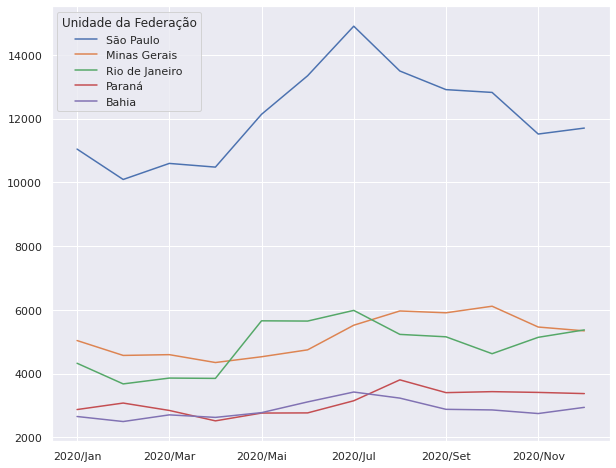

In [22]:
df_2020.T.plot(figsize=(10,8))

In [ ]:
c2, axes = plt.subplots(figsize = (10, 8))

axes.set_title("Óbitos por COVID-19 em 2020", fontsize=16, fontweight='bold')

c2, axes .set_xlabel('5 UFs com maior n° de óbitos', fontsize=14, fontweight='bold', color='#000000')
c2, axes .set_ylabel('Óbitos acumulados', fontsize=14, fontweight='bold', color='#000000')

plot_cov.T.plot()
df_2020.T.plot(color='grey')

#(start=0, stop=4, step=1)
x = np.arange(0, 4, 1)
y = np.sin(x)

# plt.plot(x, y)
plt.xticks(rotation = 45)

plt.show()

In [ ]:
fig, axes = plt.subplots(figsize = (10, 6))

axes.set_title("Óbitos acumulados por UF (durante 10 anos)", 
               fontsize=16, fontweight='bold')

fig, axes .set_xlabel('5 UFs com maior n° de óbitos', fontsize=14, fontweight='bold', color='#000000')
fig, axes .set_ylabel('Número de óbitos', fontsize=14, fontweight='bold', color='#000000')

df_2020.T.sum().plot(kind='bar', color='red')
df_2019.T.sum().plot(kind='bar', color='brown')
df_2018.T.sum().plot(kind='bar', color='brown')
df_2017.T.sum().plot(kind='bar', color='brown')
df_2016.T.sum().plot(kind='bar', color='brown')
df_2015.T.sum().plot(kind='bar', color='brown')
df_2014.T.sum().plot(kind='bar', color='brown')
df_2013.T.sum().plot(kind='bar', color='brown')
df_2012.T.sum().plot(kind='bar', color='brown')
df_2011.T.sum().plot(kind='bar', color='brown')
df_2010.T.sum().plot(kind='bar', color='brown')

#(start=0, stop=4, step=1)
x = np.arange(0, 4, 1)
y = np.sin(x)

# plt.plot(x, y)
plt.xticks(rotation = 45)

plt.show()

No gráfico acima vemos, em vermelho, o número de óbitos acumulados em 2020 e, na cor vinho, o número de óbitos acumulados de 2010 a 2019. Podemos perceber, nítidamente, que em São Paulo, Rio de Janeiro e Paraná houve mais mortes em 2020 pelo núero de óbitos acumulados no decorrer do ano. No entanto, é injusto comparar deste modo, pois devemos levar em consideração a população por ano de cada estado.

# **5. Próximos passos**

* Indicadores de mortalidade específicos por idade devem ser considerados para
uma análise mais detalhada dos níveis de mortalidade. 
* Realizar o mesmo estudo acrescentando 2021 para averiguar se há alguma diferença considerando o uso da vacina e demais acontecimentos relacionados ao COVID-19 no Brasil

# **6. Limitações**

• O uso de dados de mortalidade derivados de sistemas de registro contínuo está condicionado a correções, devido à subenumeração de óbitos, frequente em áreas menos desenvolvidas.

• Possíveis flutuações na enumeração de óbitos, sobretudo em áreas com número reduzido de eventos, recomendam o uso de médias trienais.

• A base de dados demográficos utilizada para o cálculo do indicador pode apresentar imprecisões inerentes à coleta de dados ou à metodologia empregada para elaborar estimativas populacionais.

• As projeções demográficas perdem precisão à medida que se distanciam dos anos de partida das projeções.

• Como a taxa é fortemente influenciada pela estrutura etária da população, a análise comparada entre populações de composição distinta exige padronização das estruturas etárias. As taxas padronizadas devem ser utilizadas apenas para análises comparativas. 

# **Referências**

1. http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def
2. https://brasil.io/dataset/covid19/obito_cartorio/
3. https://brasil.io/covid19/
4. http://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf
5. http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/a10.pdf
6. http://tabnet.datasus.gov.br/cgi/tabcgi.exe?ibge/cnv/projpopuf.def



## **Other**

In [ ]:
# Determinando a porcentagem de óbitos por UF
p = plot_cov.T.sum()
c = p.sum()
Prop_cov = plot_cov.T.sum() / c
Prop_cov = Prop_cov * 100
Prop_cov

In [ ]:
c = Prop_cov.sort_values(ascending=False).plot(figsize=(10,8), 
                                           kind='bar', 
                                           color='red')
c.set_title("Porcentagem por UF de óbitos por COVID-19", 
               fontsize=16, fontweight='bold')
c.set_xlabel('5 UFs com maior n° de óbitos', fontsize=14, fontweight='bold', color='#000000')
c.set_ylabel('Porcentagem (%)', fontsize=14, fontweight='bold', color='#000000')

#(start=0, stop=4, step=1)
x = np.arange(0, 4, 1)
y = np.sin(x)

# plt.plot(x, y)
plt.xticks(rotation = 45)

plt.show()